# AirBnB Listing Analysis

## Profile & QA the data
#### The objective is to read in the AirBnB listings data, calculate basic profiling metrics, change column datatypes as necessary, and filter down to only Paris Listings.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the Listings.csv file 
file_path = "Airbnb Data/Listings.csv"
try:
    listings_df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    listings_df = pd.read_csv(file_path, encoding='ISO-8859-1')

listings_df.describe()

<ipython-input-2-c5d5a24ee8e4>:6: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv(file_path, encoding='ISO-8859-1')


,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [3]:
# Cast any date columns as a datetime format
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'], errors='coerce')
listings_df.dtypes

listing_id                              int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                     object
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                      object
host_total_listings_count             float64
host_has_profile_pic                   object
host_identity_verified                 object
neighbourhood                          object
district                               object
city                                   object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                              float64
amenities                         

In [4]:
# Filter rows where the city is Paris
paris_listings = listings_df[listings_df['city'] == 'Paris']

# Select only the specified columns
selected_columns = ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']
paris_listings = paris_listings[selected_columns]

# Display the resulting DataFrame
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [5]:
# QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field
missing_values = paris_listings.isnull().sum()

min_accommodates = paris_listings['accommodates'].min()
max_accommodates = paris_listings['accommodates'].max()
avg_accommodates = paris_listings['accommodates'].mean()

min_price = paris_listings['price'].min()
max_price = paris_listings['price'].max()
avg_price = paris_listings['price'].mean()

print("Missing Values:\n", missing_values)
print("\nAccommodates - Min:", min_accommodates, "Max:", max_accommodates, "Average:", avg_accommodates)
print("Price - Min:", min_price, "Max:", max_price, "Average:", avg_price)

Missing Values:
 host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

Accommodates - Min: 0 Max: 16 Average: 3.0379965991652496
Price - Min: 0 Max: 12000 Average: 113.09644458185191


## Prepare the data for visualization
#### The objective is to produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

In [6]:
# Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)
paris_listings_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean().sort_values().reset_index()

# Display the table
paris_listings_neighbourhood

,neighbourhood,price
0,Menilmontant,74.942257
1,Buttes-Chaumont,82.690182
2,Buttes-Montmartre,87.209479
3,Reuilly,89.058402
4,Popincourt,90.559459
5,Gobelins,98.110184
6,Observatoire,101.866801
7,Batignolles-Monceau,102.612702
8,Enclos-St-Laurent,102.967156
9,Vaugirard,106.831330


In [7]:
# Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, 
# add the mean price for each value of ‘accommodates’ (sorted low to high)

# Step 1: Identify the most expensive neighbourhood
most_expensive_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean().idxmax()

# Step 2: Filter data for the most expensive neighbourhood
most_expensive_listings = paris_listings[paris_listings['neighbourhood'] == most_expensive_neighbourhood]

# Step 3 and 4: Group by 'Accommodates' and calculate mean price
paris_listings_accommodations = most_expensive_listings.groupby('accommodates')['price'].mean().sort_values().reset_index()

# Display the table
paris_listings_accommodations


,accommodates,price
0,0,0.000000
1,1,79.522222
2,3,152.828767
3,2,155.103352
4,4,212.096070
5,5,328.817073
6,6,355.508571
7,8,405.518519
8,7,411.538462
9,9,440.272727


In [8]:
# Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

# Extract the year from the 'host_since' column
paris_listings['host_since_year'] = pd.to_datetime(paris_listings['host_since']).dt.year

# Group by 'host_since_year' and calculate average price and count of rows
paris_listings_over_time = paris_listings.groupby('host_since_year').agg(
    average_price=('price', 'mean'),
    new_hosts_count=('host_since', 'count')
).reset_index()

# Display the table directly in the Jupyter Notebook or similar environment
paris_listings_over_time

,host_since_year,average_price,new_hosts_count
0,2008.0,77.750000,4
1,2009.0,159.641509,106
2,2010.0,125.031250,416
3,2011.0,124.828230,1339
4,2012.0,111.578615,4592
5,2013.0,107.096414,8142
6,2014.0,100.253800,10922
7,2015.0,103.646250,12147
8,2016.0,114.159847,8871
9,2017.0,108.658888,4585


## Visualize the data and summarize findings
#### The objective is to build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

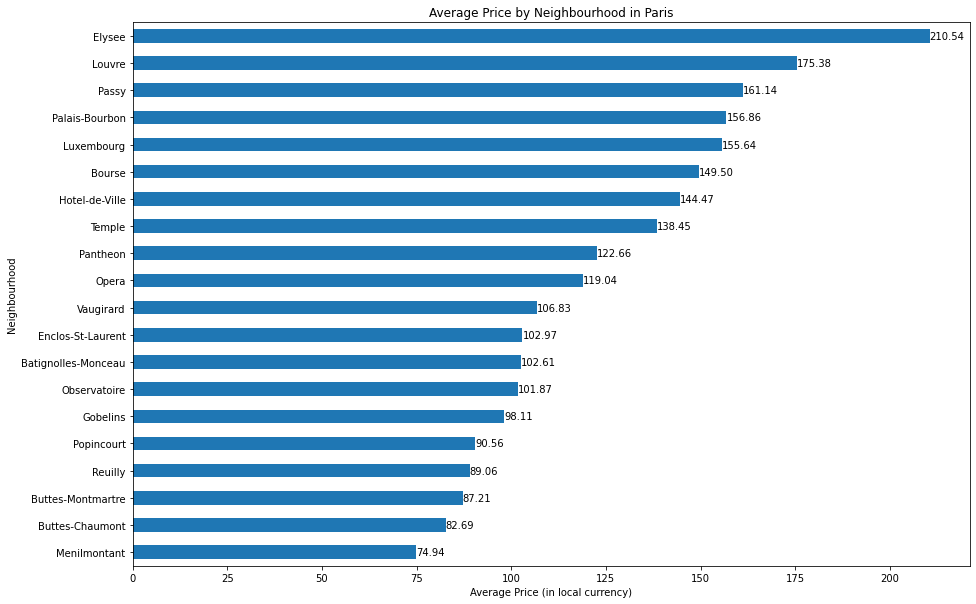

In [9]:
# Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

# Step 1: Calculate average price by neighbourhood
avg_price_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)

# Step 2: Plot the bar chart
plt.figure(figsize=(15, 10))  # Adjust the size of the figure as needed
ax = avg_price_neighbourhood.plot(kind='barh')
plt.title('Average Price by Neighbourhood in Paris')  # Add title
plt.xlabel('Average Price (in local currency)')  # Customize x-axis label
plt.ylabel('Neighbourhood')  # Customize y-axis label

# Annotate each bar with its value
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             '{:.2f}'.format(bar.get_width()),
             va='center', ha='left')

# Display the plot
plt.show()

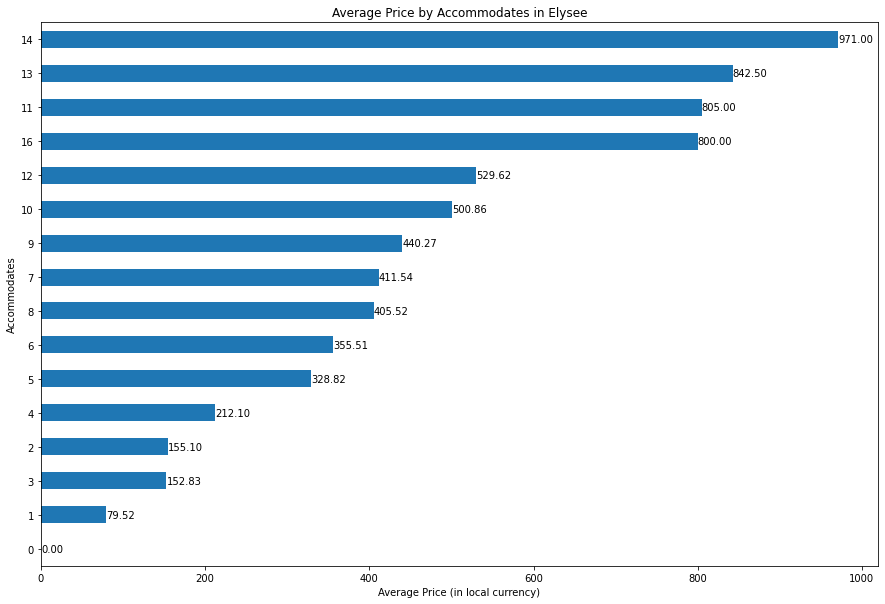

In [10]:
# Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

# Step 1: Identify the most expensive neighbourhood
most_expensive_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean().idxmax()

# Step 2: Calculate average price by 'accommodates' in this neighbourhood
expensive_neighbourhood_data = paris_listings[paris_listings['neighbourhood'] == most_expensive_neighbourhood]
avg_price_accommodates = expensive_neighbourhood_data.groupby('accommodates')['price'].mean().sort_values(ascending=True)

# Step 3: Plot the bar chart with annotations
plt.figure(figsize=(15, 10))  # Adjust the size of the figure as needed
ax = avg_price_accommodates.plot(kind='barh')
plt.title(f'Average Price by Accommodates in {most_expensive_neighbourhood}')  # Add title
plt.xlabel('Average Price (in local currency)')  # Customize x-axis label
plt.ylabel('Accommodates')  # Customize y-axis label

# Annotate each bar with its value
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             '{:.2f}'.format(bar.get_width()),
             va='center', ha='left')

# Display the plot
plt.show()

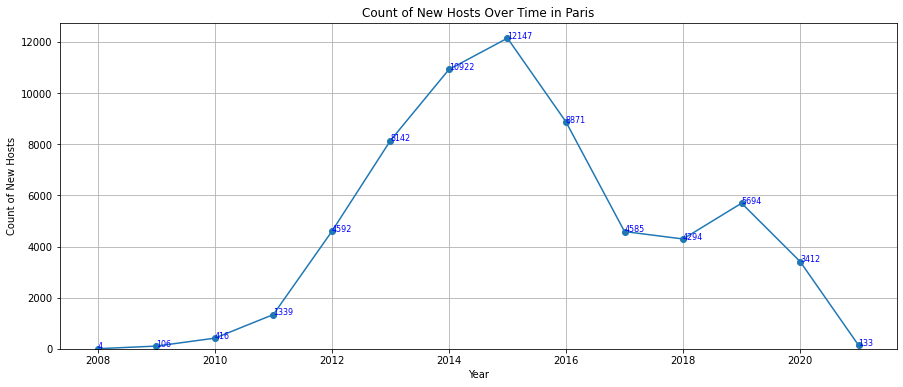

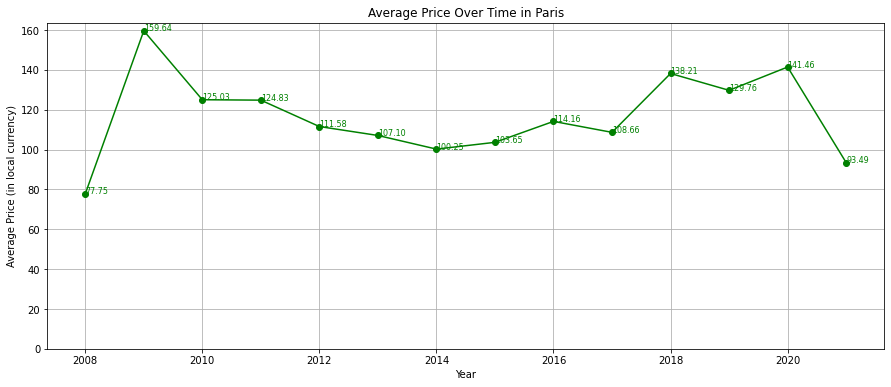

In [11]:
# Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

# Prepare the data as described earlier
paris_listings['host_since_year'] = paris_listings['host_since'].dt.year
paris_listings_over_time = paris_listings.groupby('host_since_year').agg(
    average_price=('price', 'mean'),
    new_hosts_count=('host_since', 'count')
).reset_index()

# Plot the line chart for the count of new hosts over time with annotations
plt.figure(figsize=(15, 6))
plt.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['new_hosts_count'], marker='o')
plt.title('Count of New Hosts Over Time in Paris')
plt.xlabel('Year')
plt.ylabel('Count of New Hosts')
plt.ylim(0)  # Set y-axis limit to 0
plt.grid(True)

# Annotate each point with its value
for x, y in zip(paris_listings_over_time['host_since_year'], paris_listings_over_time['new_hosts_count']):
    plt.text(x, y, str(y), color="blue", fontsize=8)

plt.show()

# Plot the line chart for the average price over time with annotations
plt.figure(figsize=(15, 6))
plt.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['average_price'], marker='o', color='green')
plt.title('Average Price Over Time in Paris')
plt.xlabel('Year')
plt.ylabel('Average Price (in local currency)')
plt.ylim(0)  # Set y-axis limit to 0
plt.grid(True)

# Annotate each point with its value
for x, y in zip(paris_listings_over_time['host_since_year'], paris_listings_over_time['average_price']):
    plt.text(x, y, '{:.2f}'.format(y), color="green", fontsize=8)

plt.show()

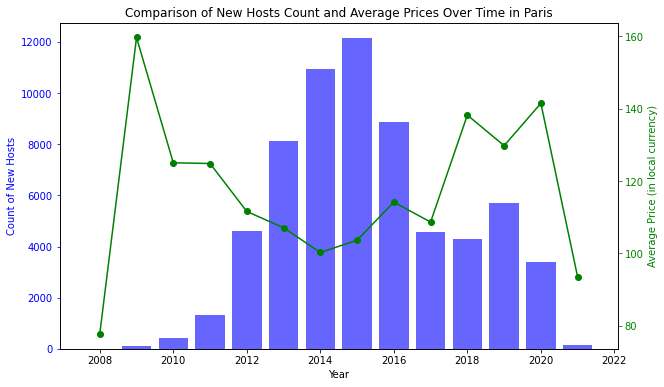

In [12]:
# How would you describe the visual relationship between the number of hosts and prices?

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of hosts on the left y-axis
ax1.bar(paris_listings_over_time['host_since_year'], paris_listings_over_time['new_hosts_count'], color='b', alpha=0.6)
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of New Hosts', color='b')
ax1.tick_params('y', colors='b')

# Create another y-axis for the average price
ax2 = ax1.twinx()
ax2.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['average_price'], color='g', marker='o')
ax2.set_ylabel('Average Price (in local currency)', color='g')
ax2.tick_params('y', colors='g')

# Add a title and show the plot
plt.title('Comparison of New Hosts Count and Average Prices Over Time in Paris')
plt.show()

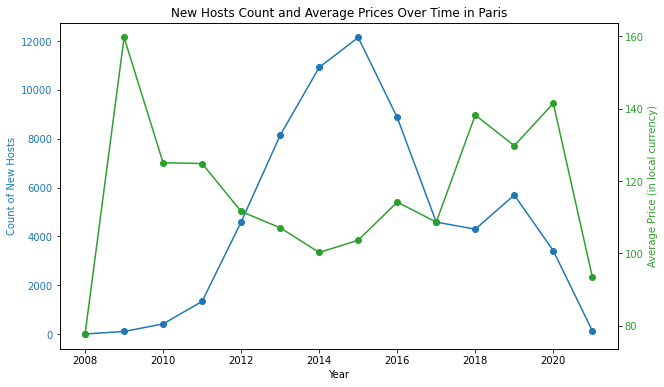

In [13]:
# Create a dual axis line chart to show both new hosts and average price over time

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of new hosts over time on the first y-axis (left side)
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of New Hosts', color=color)
ax1.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['new_hosts_count'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis (right side) sharing the same x-axis
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Average Price (in local currency)', color=color)  
ax2.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['average_price'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('New Hosts Count and Average Prices Over Time in Paris')

# Show the plot
plt.show()

In [14]:
# Which neighborhood in Paris has the highest average AirBnB listing price?

# Group by neighbourhood and calculate mean price
average_prices_by_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean()

# Sort the results to find the neighbourhood with the highest average price
most_expensive_neighbourhood = average_prices_by_neighbourhood.sort_values(ascending=False).head(1)

print(most_expensive_neighbourhood)

neighbourhood
Elysee    210.536765
Name: price, dtype: float64


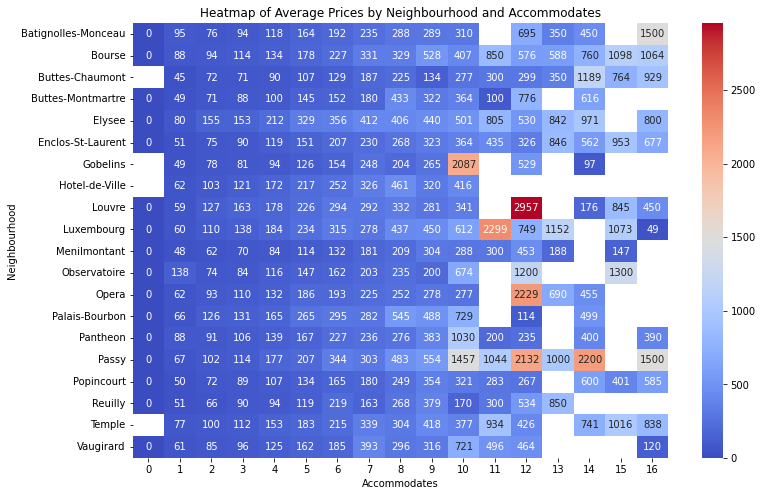

In [15]:
# Heatmap of Listing Prices by Neighbourhood and Accommodates
# Prepare a pivot table
pivot_table = paris_listings.pivot_table(values='price', index='neighbourhood', columns='accommodates', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Heatmap of Average Prices by Neighbourhood and Accommodates")
plt.xlabel("Accommodates")
plt.ylabel("Neighbourhood")
plt.show()

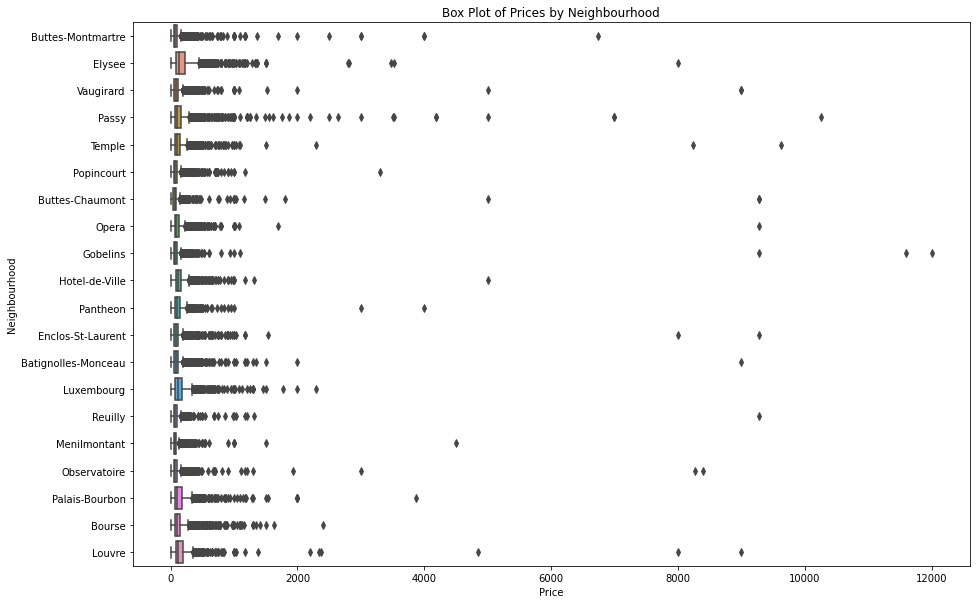

In [16]:
# Box Plots of Prices by Neighbourhood

plt.figure(figsize=(15, 10))
sns.boxplot(data=paris_listings, x='price', y='neighbourhood')
plt.title('Box Plot of Prices by Neighbourhood')
plt.xlabel('Price')
plt.ylabel('Neighbourhood')
plt.show()

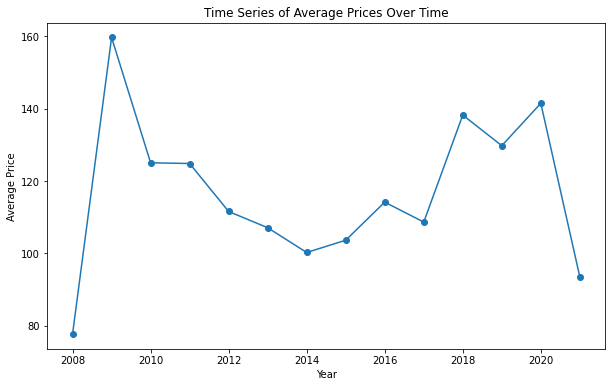

In [17]:
# Time Series Analysis

paris_listings['year'] = paris_listings['host_since'].dt.year
time_series_data = paris_listings.groupby('year')['price'].mean()

plt.figure(figsize=(10, 6))
time_series_data.plot(kind='line', marker='o')
plt.title('Time Series of Average Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


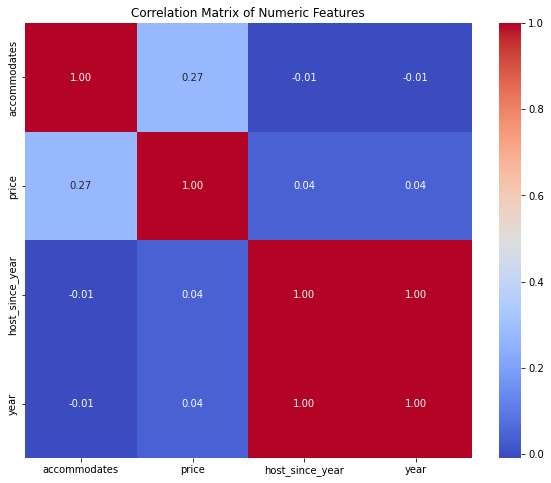

In [18]:
# correlation matrix, A heatmap showing correlations between different numerical variables.
corr = paris_listings.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


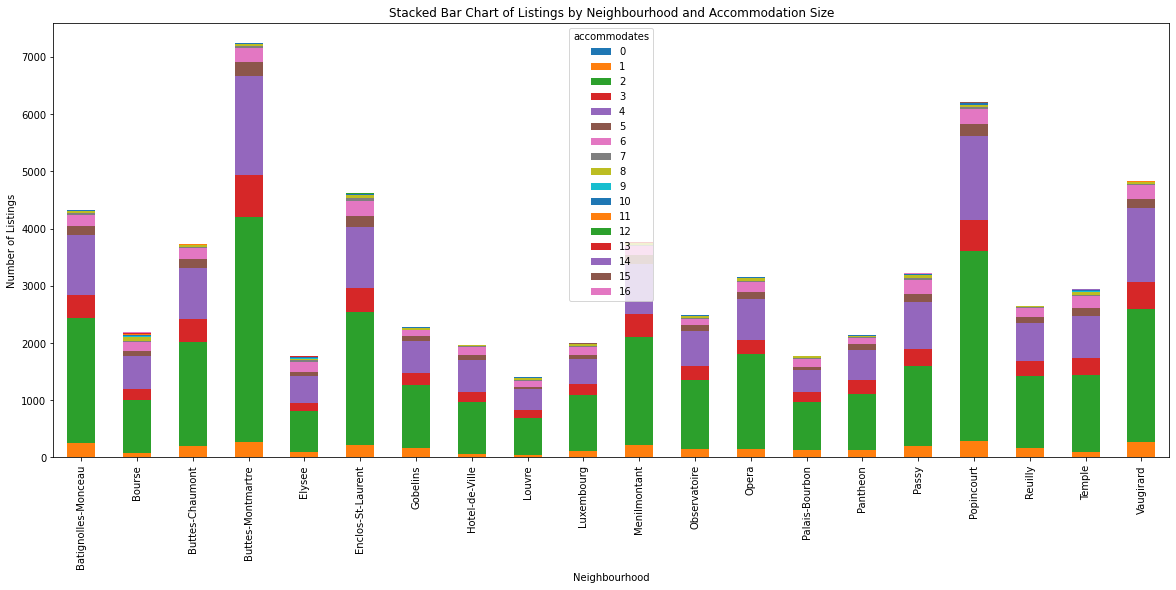

In [19]:
# Example: Stacked bar chart of listings by neighbourhood and accommodation size
stacked_data = paris_listings.groupby(['neighbourhood', 'accommodates']).size().unstack()

stacked_data.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.title('Stacked Bar Chart of Listings by Neighbourhood and Accommodation Size')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.show()

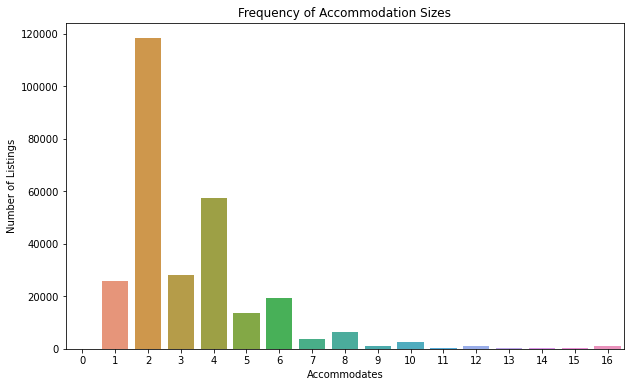

In [20]:
# Number of Accommodations
accommodation_counts = listings_df['accommodates'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=accommodation_counts.index, y=accommodation_counts.values)
plt.title('Frequency of Accommodation Sizes')
plt.xlabel('Accommodates')
plt.ylabel('Number of Listings')
plt.show()

# Top 10

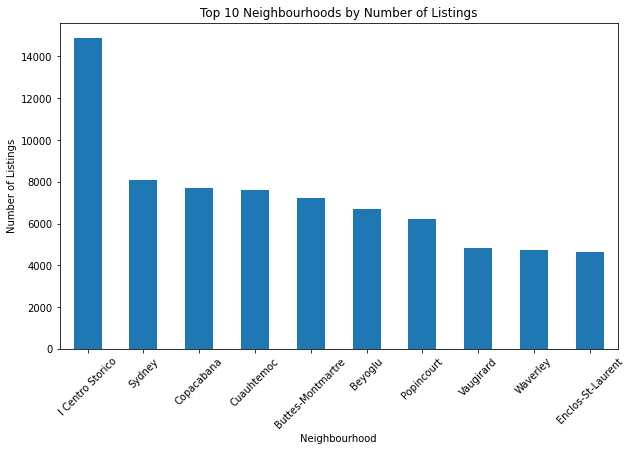

In [21]:
# Top 10 Neighbourhoods by Number of Listings

top_neighbourhoods = listings_df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_neighbourhoods.plot(kind='bar')
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

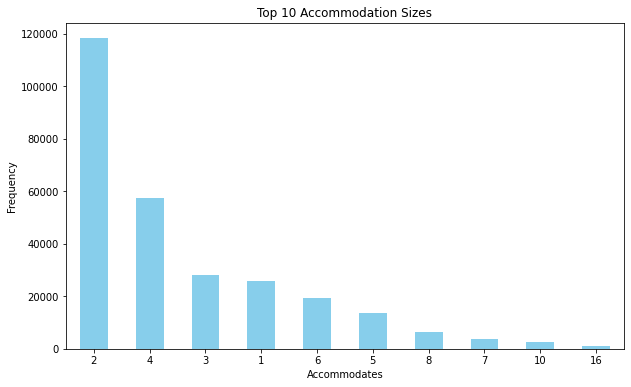

In [22]:
# Top 10 Accommodation Sizes
top_accommodates = listings_df['accommodates'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_accommodates.plot(kind='bar', color='skyblue')
plt.title('Top 10 Accommodation Sizes')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

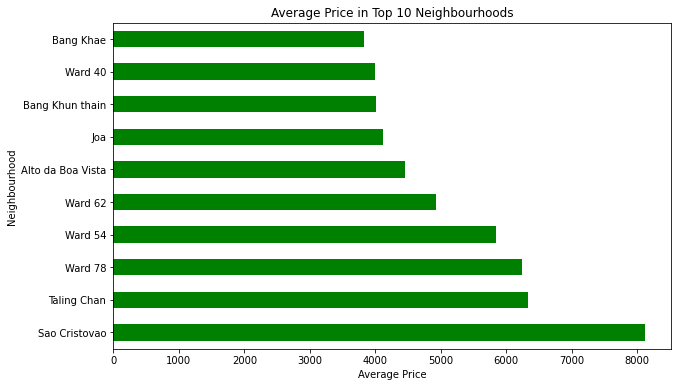

In [23]:
# Average Price of Top 10 Neighbourhoods
average_prices = listings_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
average_prices.plot(kind='barh', color='green')
plt.title('Average Price in Top 10 Neighbourhoods')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()

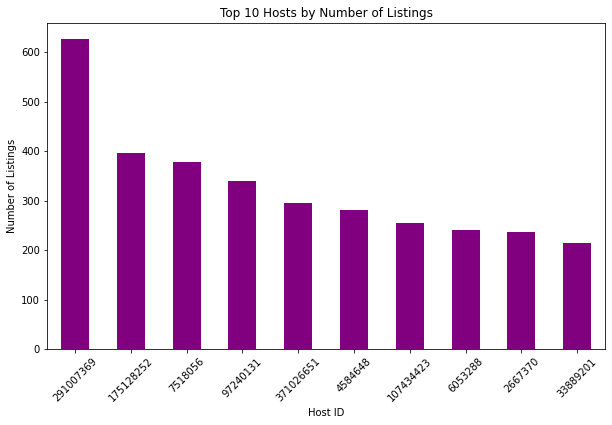

In [24]:
# Top 10 Hosts by Number of Listings
top_hosts = listings_df['host_id'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_hosts.plot(kind='bar', color='purple')
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


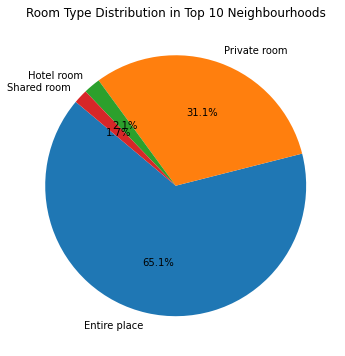

In [25]:
# Room Type Distribution in Top 10 Neighbourhoods
room_types = listings_df['room_type'].value_counts()

plt.figure(figsize=(10, 6))
room_types.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Room Type Distribution in Top 10 Neighbourhoods')
plt.ylabel('')
plt.show()

